<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Manual_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")


In [8]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
166,167,2013.416667,0.0,292.99780,6,24.97744,121.54458,73.6
103,104,2012.750000,0.0,208.39050,6,24.95618,121.53844,45.7
373,374,2013.083333,0.0,274.01440,1,24.97480,121.53059,52.2
105,106,2012.833333,0.0,292.99780,6,24.97744,121.54458,71.0
123,124,2013.416667,0.0,185.42960,0,24.97110,121.53170,45.5
...,...,...,...,...,...,...,...,...
128,129,2013.083333,41.3,124.99120,6,24.96674,121.54039,60.7
173,174,2013.083333,41.3,401.88070,4,24.98326,121.54460,35.1
361,362,2013.083333,41.4,281.20500,8,24.97345,121.54093,63.3
392,393,2013.083333,42.7,443.80200,6,24.97927,121.53874,35.3


In [7]:
df = df.sort_values("X2 house age")
#df.tail(30)

In [10]:
x = df["X2 house age"]
y = df["Y house price of unit area"]

In [92]:
x = np.sort(np.array(x))
y = np.sort(np.array(y))

In [114]:
x

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1.1,  1.1,  1.1,  1.1,
        1.1,  1.5,  1.5,  1.7,  1.8,  1.9,  2. ,  2. ,  2.1,  2.3,  2.5,
        2.6,  2.6,  2.7,  3.1,  3.1,  3.2,  3.4,  3.5,  3.5,  3.5,  3.6,
        3.6,  3.7,  3.8,  3.8,  3.9,  3.9,  4. ,  4. ,  4. ,  4. ,  4.1,
        4.1,  4.1,  4.3,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.1,
        5.2,  5.2,  5.3,  5.4,  5.6,  5.6,  5.7,  5.9,  5.9,  6.2,  6.2,
        6.3,  6.4,  6.4,  6.5,  6.5,  6.6,  6.6,  6.8,  7.1,  7.1,  7.1,
        7.5,  7.6,  7.8,  7.8,  8. ,  8. ,  8. ,  8.1,  8.1,  8.3,  8.4,
        8.5,  8.5,  8.9,  8.9,  9. ,  9.1,  9.1,  9.7,  9.9,  9.9, 10. ,
       10.1, 10.3, 10.3, 10.4, 10.4, 10.5, 10.8, 11. , 11. , 11.4, 11.5,
       11.6, 11.6, 11.8, 11.9, 11.9, 12. , 12. , 12.2, 12.2, 12.3, 12.4,
       12.5, 12.5, 12.6, 12.7, 12.7, 12.7, 12.8, 12.8, 12.9, 12.9, 12.9,
       13. , 13. , 13. , 13. , 13.1, 13.1, 13.1, 13

<function matplotlib.pyplot.show(*args, **kw)>

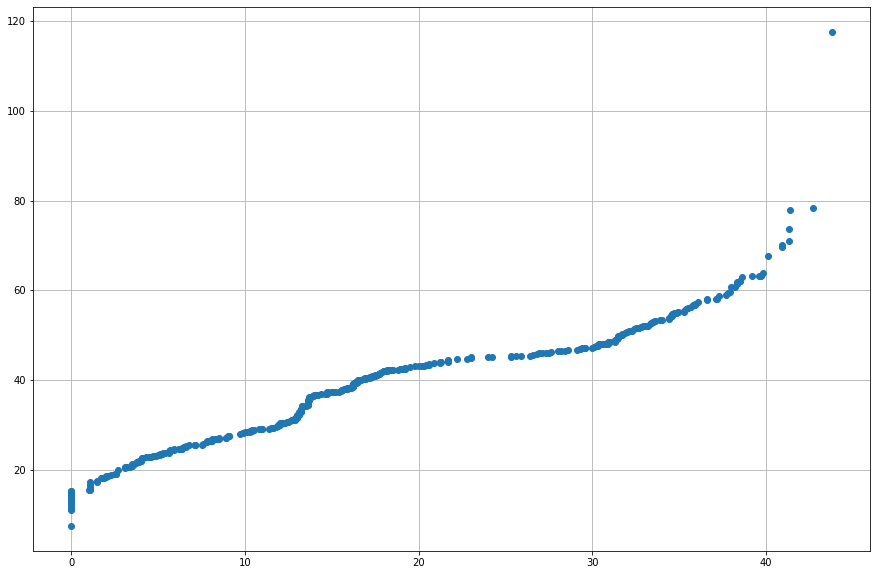

In [94]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, "o")
plt.grid()
plt.show

In [95]:
def line(theta0, theta1, X):

  h = np.array ( theta0 + (theta1 * X) )
  
  return h

#Gredient Descent

In [96]:
def error(theta0, theta1, X):
  
  E  = 0.5 * sum( (line(theta0, theta1, X) - y)**2 )

  return E

In [97]:
def diff_E(theta0, theta1, X):

  dE = sum((line(theta0, theta1, X) - y))

  return dE

In [19]:
B0, B1 = np.random.rand(), np.random.rand()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(line(B0, B1, x), "-o")
print(np.mean(line(B0, B1, x)))
plt.show()

In [99]:
steps = []
alpha = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000]
theta0 = []
theta1 = []

for i in alpha:
  B0, B1 = np.random.rand(), np.random.rand()
  iter = 0
  #a = 0.00001
  dx = 0.000001
  E = error(B0, B1, x)
  dE = diff_E(B0, B1, x)
  
  while (abs(dE) > dx) and (iter < 10000) :
    
    B0 = B0 - (i * (dE))
    B1 = B1 - (i * (dE))
    
    dE = diff_E(B0, B1, x)

    
    
    
    iter += 1
  steps.append(iter)

  theta0.append(B0)
  theta1.append(B1)

  print(i, iter)
Thetas = list(zip(theta0, theta1))
print(Thetas)

1e-12 10000
1e-11 10000
1e-10 10000
1e-09 10000
1e-08 10000
1e-07 10000
1e-06 2946
1e-05 285
0.0001 16
0.001 368
0.01 163
0.1 107
1 80
10 64
100 53
1000 45
10000 40
100000 35
[(0.1786935376078264, 0.022308530845093072), (0.2563754650730561, 0.20756998292867218), (0.3344345046570237, 0.13158466294925197), (1.1048073826976845, 0.17278003135445702), (1.3650183351494054, 1.439057065789984), (2.0737275770385426, 2.0262644787586845), (2.0874395512939006, 2.0264012034323864), (1.7487336038170727, 2.0455235629374067), (2.772852967135332, 1.987704741713898), (-inf, -inf), (inf, inf), (inf, inf), (-inf, -inf), (-inf, -inf), (inf, inf), (inf, inf), (-inf, -inf), (inf, inf)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: R

Minimum : 16 
Index of Min Steps : 8 
Value of a for min steps : 0.0001

theta0 is :2.772852967135332
theta1 is :1.987704741713898


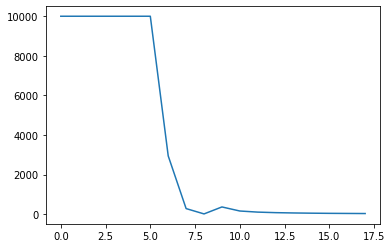

In [103]:

print(f"Minimum : {min(steps)} \nIndex of Min Steps : {steps.index(min(steps))} \nValue of a for min steps : {alpha[steps.index(min(steps))]}\n")
print(f"theta0 is :{(Thetas[steps.index(min(steps))])[0]}\ntheta1 is :{(Thetas[steps.index(min(steps))])[1]}")
plt.plot(steps)


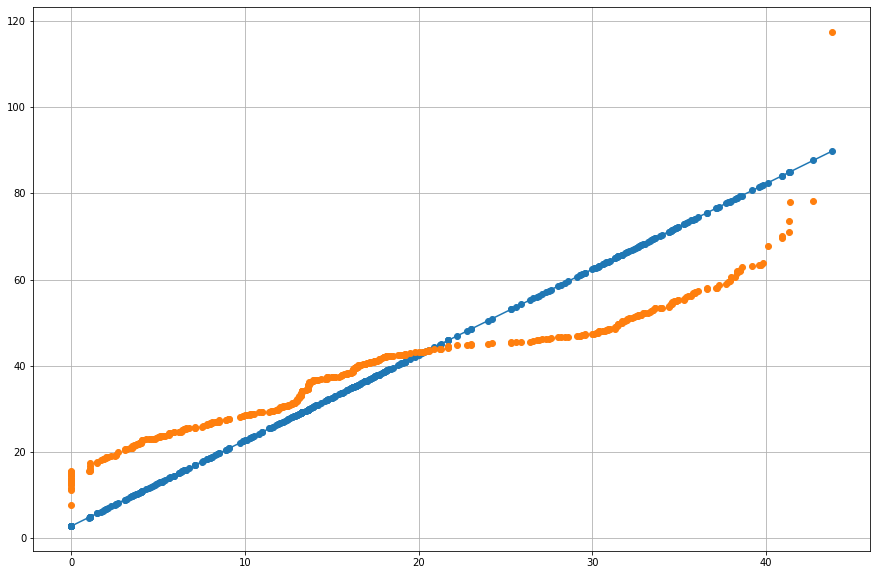

In [101]:
plt.figure(figsize=(15, 10))
plt.plot(x, line((Thetas[steps.index(min(steps))])[0], (Thetas[steps.index(min(steps))])[1], x), '-o')
plt.plot(x, y, "o")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


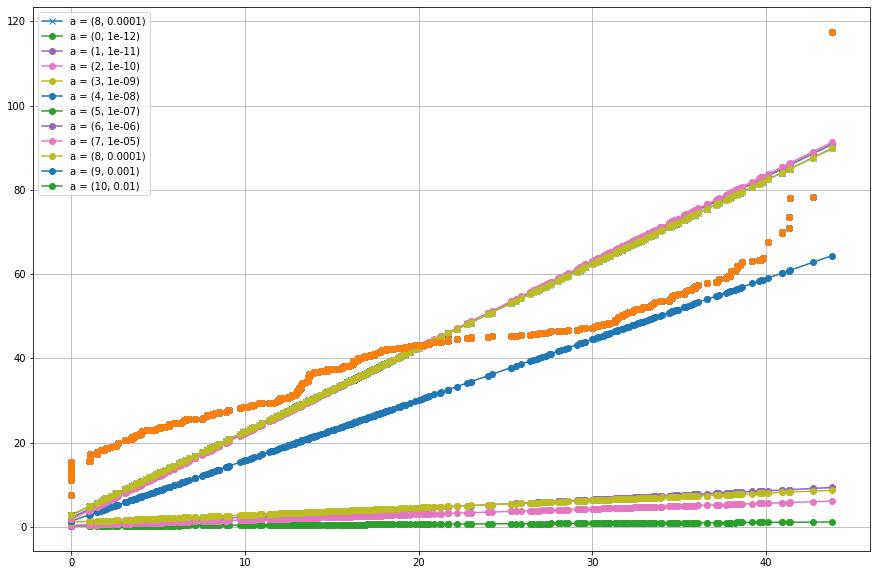

In [113]:
plt.figure(figsize=(15, 10))
plt.plot(x, line( (Thetas[8][0]), (Thetas[8][1]), x), '-x', label= f"a = {8, alpha[8]}")


for i in range(len(Thetas)-7):
  plt.plot(x, y, "o")
  plt.plot(x, line( (Thetas[i][0]), (Thetas[i][1]), x), '-o', label= f"a = {i, alpha[i]}")
  plt.grid()
  plt.legend()
  plt.plot()
